## Erick Iván Castro Granados 

## Tarea Selección y métricas de modelos

## Módulo 4 

## ITAM 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from ipywidgets import interact, FloatSlider
from numpy.random import seed, randn
from sklearn.preprocessing import Normalizer
from scipy.special import gamma
from scipy.optimize import minimize
from sklearn.model_selection import cross_validate
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

In [2]:
%config InlineBackend.figure_format = "retina"
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["font.size"] = 13

In [3]:
housing = fetch_california_housing()
xtrain, xtest, ytrain, ytest = train_test_split(housing.data, housing.target,
                                                test_size=0.2, random_state=314)

linmodel = LinearRegression()
scores = cross_validate(linmodel, xtrain, ytrain,
                          cv=10, scoring="neg_mean_absolute_error",
                           return_train_score=True)

In [4]:
scores = -scores["test_score"]

# Al evaluar nuestro modelo, observamos que, en promedio,
# hubiésemos estimado con un error de ± 53,101USD.
mean_err = (scores * 100_000).mean()
std_ytrain = (ytrain * 100_000).std()

In [5]:
# p(t|x)
print(f"Desviación cross-validation: {mean_err:>15,.2f}")
# p(t)
print(f"Desviación estándar de los datos: {std_ytrain:>11,.2f}")

Desviación cross-validation:       53,101.65
Desviación estándar de los datos:  115,460.34


In [6]:
# Validando resultado final de los datos
from sklearn.metrics import mean_absolute_error

linmodel.fit(xtrain, ytrain)
yhat_test = linmodel.predict(xtest) * 100_000

err = mean_absolute_error(ytest* 100_000, yhat_test)
print(f"{err:,.2f}")

53,484.16


In [7]:
housing = pd.read_csv("train.csv")
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
housing.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


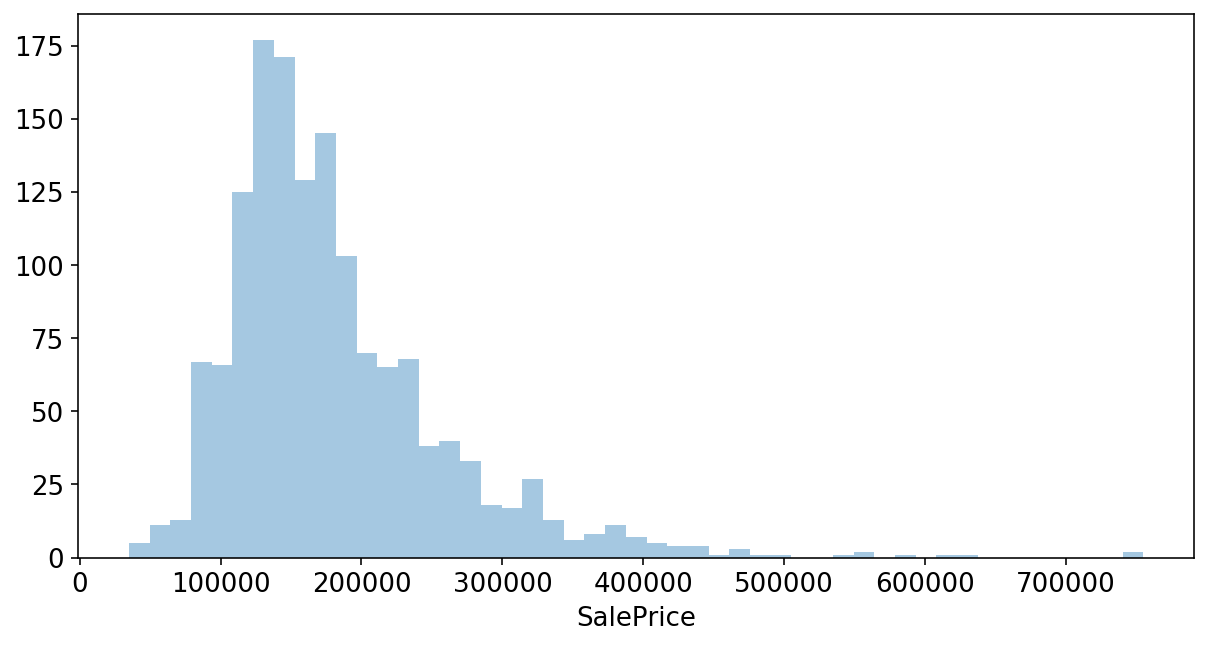

In [9]:
sns.distplot(housing.SalePrice, kde=False)

In [10]:
lb = OneHotEncoder(sparse=False)
lb.fit_transform(housing[["SaleCondition"]])

array([[0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.]])

In [11]:
housing.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


## Transformers
Empezamos a aplicar transformaciones a las columnas, intentando aumentar $r^2$

In [12]:
## primera prueba
column_selector = ColumnTransformer(
    [("label_bin", OneHotEncoder(sparse=False), ["MSZoning", "SaleCondition"])]
)

columns_ohe = column_selector.fit_transform(housing)
columns_ohe

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [13]:
## prueba
### make_column_selector
column_selector = ColumnTransformer(
    [("label_bin", OneHotEncoder(sparse=False), ["MSZoning", "SaleCondition"]),
     ("numeric", SimpleImputer(), make_column_selector(dtype_include="float"))]
)

X = column_selector.fit_transform(housing)
X

array([[   0.,    0.,    0., ...,   65.,  196., 2003.],
       [   0.,    0.,    0., ...,   80.,    0., 1976.],
       [   0.,    0.,    0., ...,   68.,  162., 2001.],
       ...,
       [   0.,    0.,    0., ...,   66.,    0., 1941.],
       [   0.,    0.,    0., ...,   68.,    0., 1950.],
       [   0.,    0.,    0., ...,   75.,    0., 1965.]])

In [13]:
## prueba
## OrdinalEncoder()
from sklearn.preprocessing import OrdinalEncoder
column_selector = ColumnTransformer(
    [("label_bin", OrdinalEncoder(), ["MSZoning", "SaleCondition"]),
     ("numeric", SimpleImputer(), make_column_selector(dtype_include="float"))]
)

X = column_selector.fit_transform(housing)
X

array([[   3.,    4.,   65.,  196., 2003.],
       [   3.,    4.,   80.,    0., 1976.],
       [   3.,    4.,   68.,  162., 2001.],
       ...,
       [   3.,    4.,   66.,    0., 1941.],
       [   3.,    4.,   68.,    0., 1950.],
       [   3.,    4.,   75.,    0., 1965.]])

In [103]:
##prueba
##  PolynomialFeatures()
from sklearn.preprocessing import PolynomialFeatures
column_selector = ColumnTransformer(
    [("numeric", SimpleImputer(), make_column_selector(dtype_include="float")),
     ("poly", PolynomialFeatures(5), make_column_selector(dtype_include="int")),
    ("label_bin", OrdinalEncoder(), ["MSZoning", "SaleCondition"])]
)

X = column_selector.fit_transform(housing)
X

array([[  65.,  196., 2003.,    3.,    4.],
       [  80.,    0., 1976.,    3.,    4.],
       [  68.,  162., 2001.,    3.,    4.],
       ...,
       [  66.,    0., 1941.,    3.,    4.],
       [  68.,    0., 1950.,    3.,    4.],
       [  75.,    0., 1965.,    3.,    4.]])

In [171]:
##prueba
##  Normalizer
from sklearn.preprocessing import Normalizer
column_selector = ColumnTransformer(
    [("numeric", SimpleImputer(), make_column_selector(dtype_include="float")),
     ("norm", Normalizer(), make_column_selector(dtype_include="int")),
    ("label_bin", OrdinalEncoder(), ["MSZoning", "SaleCondition"])]
)

X = column_selector.fit_transform(housing)
X

array([[  65.,  196., 2003.,    3.,    4.],
       [  80.,    0., 1976.,    3.,    4.],
       [  68.,  162., 2001.,    3.,    4.],
       ...,
       [  66.,    0., 1941.,    3.,    4.],
       [  68.,    0., 1950.,    3.,    4.],
       [  75.,    0., 1965.,    3.,    4.]])

In [24]:
##prueba
##  
from sklearn.preprocessing import RobustScaler
column_selector = ColumnTransformer(
    [("RobustSc", RobustScaler(), make_column_selector(dtype_include="float"))]
)

X = column_selector.fit_transform(housing)
X

array([[-0.19047619,  1.18072289,  0.56097561],
       [ 0.52380952,  0.        , -0.09756098],
       [-0.04761905,  0.97590361,  0.51219512],
       ...,
       [-0.14285714,  0.        , -0.95121951],
       [-0.04761905,  0.        , -0.73170732],
       [ 0.28571429,  0.        , -0.36585366]])

In [14]:
"""
column_selector = ColumnTransformer(
    [("label_bin", OneHotEncoder(sparse=False), ["MSZoning", "SaleCondition"]),
     ("numeric", SimpleImputer(), make_column_selector(dtype_include="float"))]
)

pipe = Pipeline([
    ("select_cols", column_selector),
    ("lasso", Lasso(alpha=0.1, tol=0.5))
])
"""

## Pipeline final con el transformer indicado

In [39]:
## Pipeline final
column_selector =  ColumnTransformer(
    [("poly", PolynomialFeatures(degree=3), make_column_selector(dtype_include="int")),
    ("label_bin", OneHotEncoder(sparse=False), ["MSZoning", "SaleCondition"]),
    ("numeric", SimpleImputer(), make_column_selector(dtype_include="float")),
     ("norm", Normalizer(), make_column_selector(dtype_include="int"))]
)

pipe = Pipeline([
    ("select_cols", column_selector),
    ("lasso", Lasso(alpha=0.1, tol=0.5))
])

## Entrenando el modelo final

In [40]:
## Entrenando el modelo final
train, test = train_test_split(housing, test_size=0.2, random_state=2718)
xtrain, ytrain = train.drop("SalePrice", axis=1), train["SalePrice"]

cv = cross_validate(pipe, xtrain, ytrain, cv=4, scoring=["r2", "neg_mean_absolute_error"])
r2 = cv["test_r2"]
mae = -cv["test_neg_mean_absolute_error"]

## Resultado

In [42]:
## Resultados

print(f"mean r2: {r2.mean():0.2f}")
print(f"mean mae: {mae.mean():,.2f}")

mean r2: 0.45
mean mae: 41,531.61


In [46]:
################## Demostración de la formula vista en clase ########################

## Demostración derivada $\sigma(x)$ 

$$
\frac{d}{dx}\sigma(x)= \frac{d}{dx} \frac{1}{1+\exp(-x)} = \frac{0*(1+\exp(-x))-1*(1+\exp(-x))'}{(1+\exp(-x))^2} = 
\frac{\exp(-x)}{(1+\exp(-x))^2}
$$
$$
= \frac{1}{1+\exp(-x)}*\frac{\exp(-x)}{1+\exp(-x)} = \sigma(x)*(1-\sigma(x))
$$
Ya que 
$$
1-\sigma(x)=1-\frac{1}{1+\exp(-x)}=\frac{1+\exp(-x)}{1+\exp(-x)}-\frac{1}{1+\exp(-x)}=\frac{\exp(-x)}{1+\exp(-x)}
$$
Q.E.D.